In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# !kaggle
# !kaggle datasets download -d yasserh/titanic-dataset
# !tar -xf titanic-dataset.zip

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex']]
Y = df[['Fare']]
X = X.copy()
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Sex'] = X['Sex'].map({'male': 1, 'female':0})
X.info()
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Sex     891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB
None


In [4]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
print(X.shape)
print(Y.shape)

(891, 5)
(891, 1)


In [8]:
Y = Y.values
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(891, 1)


In [9]:
w = np.zeros((X.shape[1], 1))
w.shape

(5, 1)

In [10]:
b = 0

In [59]:
n = X.shape[0]
n

891

In [21]:
print(X.shape) #(891, 5)
print(Y.shape) #(891, 1)
eta = 0.01
n = X.shape[0]
mse_errors = []
for i in range(2000):
    y_pred = X @ w + b # (891, 1) = (891, 5) @ (5, 1) + b
    error = y_pred - Y #(891, 1) 
    dw = (2 / n) * (X.T @ error) #(5, 891) @ (891, 1) = (5, 1)
    db = (2 / n) * np.sum(error, axis = 0)
    w -= eta * dw
    b -= eta * db
    mse = (error**2).mean()
    mse_errors.append(mse)

(891, 5)
(891, 1)


In [22]:
mse_errors[-1]

1548.6822945457798

In [23]:
w

array([[-28.19226042],
       [ -1.71493223],
       [  6.39728024],
       [  7.66491587],
       [ -2.57778957]])

In [24]:
b

array([32.20420797])

In [14]:
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)

In [29]:
w.shape

(5, 1)

In [30]:
model.coef_.shape

(1, 5)

In [33]:
w - model.coef_.reshape(-1, 1)

array([[ 4.72120121e-11],
       [ 5.80382409e-11],
       [ 9.02700137e-11],
       [-8.92281804e-11],
       [-5.13145082e-11]])

In [16]:
model.intercept_

array([32.20420797])

In [17]:
mse_lib = mean_squared_error(Y, y_pred)
print(mse_lib)

1548.6822945457805


In [20]:
type(mse_errors[0])

numpy.float64

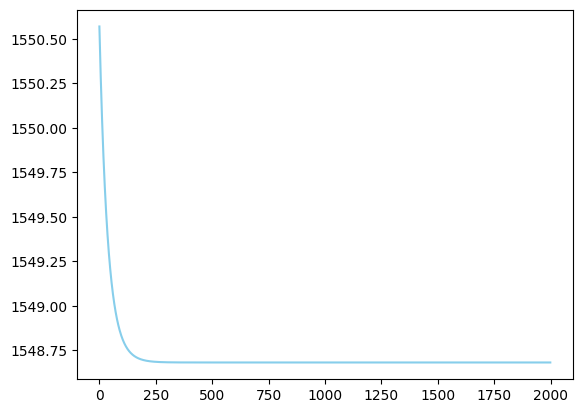

In [25]:
plt.plot(range(len(mse_errors)), mse_errors, c='skyblue')
plt.show()